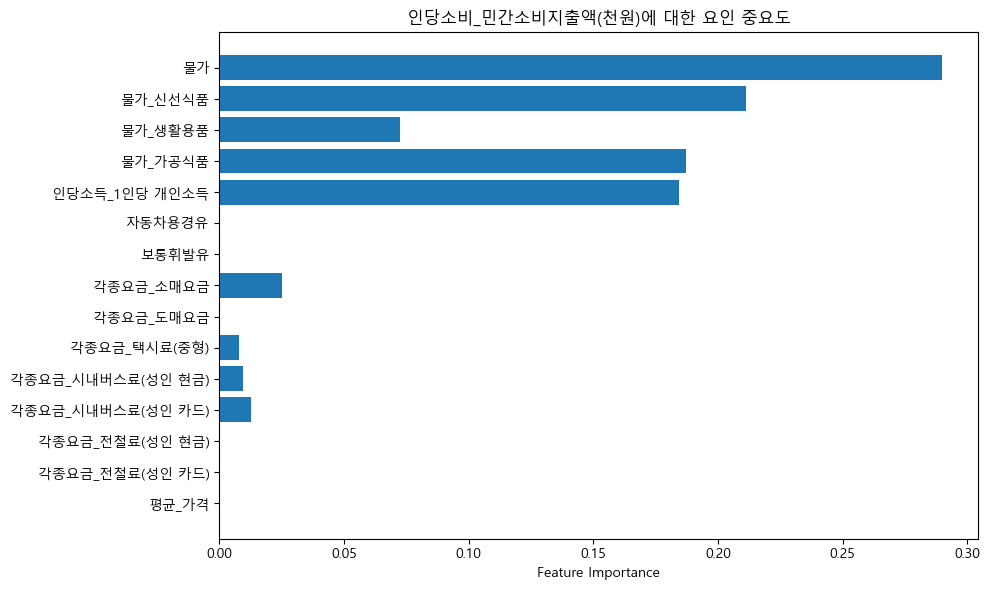

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('최종_통합_병합결과.csv', encoding='utf-8')

# 수치형 컬럼만 남기고 결측치 제거
df_clean = df.dropna(subset=['인당소비_민간소비지출액(천원)'])
df_clean = df_clean.select_dtypes(include=['number'])

# X, y 분리
X = df_clean.drop(columns=['인당소비_민간소비지출액(천원)'])
y = df_clean['인당소비_민간소비지출액(천원)']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 중요도 시각화
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("인당소비_민간소비지출액(천원)에 대한 요인 중요도")
plt.tight_layout()
plt.show()


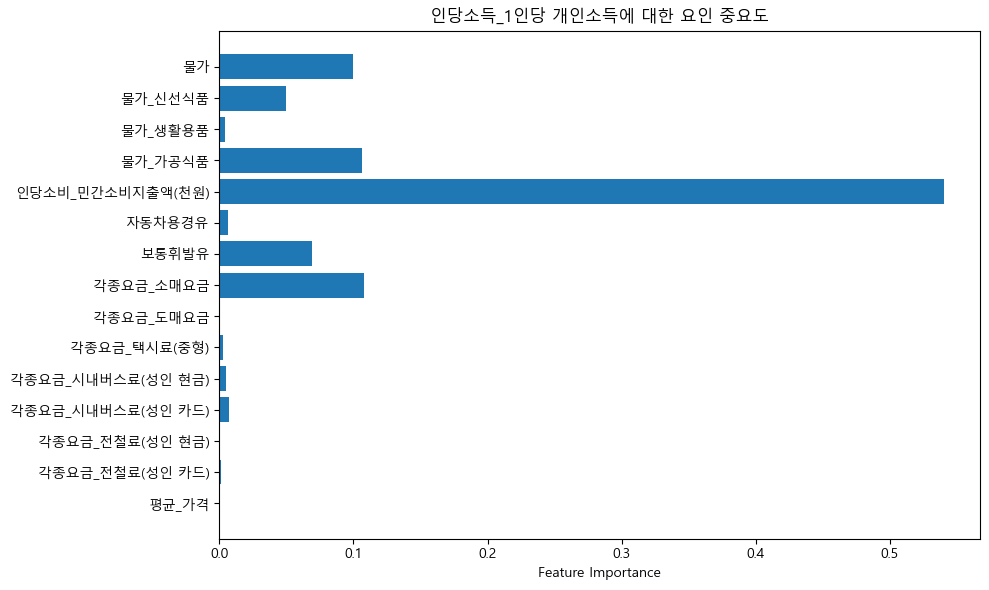

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 데이터 불러오기
df = pd.read_csv('최종_통합_병합결과.csv', encoding='utf-8')

# 수치형 컬럼만 남기고 결측치 제거
df_clean = df.dropna(subset=['인당소득_1인당 개인소득'])
df_clean = df_clean.select_dtypes(include=['number'])

# X, y 분리
X = df_clean.drop(columns=['인당소득_1인당 개인소득'])
y = df_clean['인당소득_1인당 개인소득']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 중요도 시각화
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("인당소득_1인당 개인소득에 대한 요인 중요도")
plt.tight_layout()
plt.show()


소비가 가장 연관성이 높다고 나와있다는 의문의 결과가 나오기에, 1인당 지출에서 가장 영향력이 컸다고 나온 물가를 이용한 실질 소득과 소비를 이용한 실질 소득을 실질 생활비를 활용해 소비_소득_비율을 이용하여 더 정확한 쪽을 택하기로 한다.

In [39]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("최종_통합_병합결과.csv", encoding='utf-8')

# 1. 실질 생활비 계산 (물가를 10000 기준으로 환산)
df["실질생활비(추정)"] = df["인당소비_민간소비지출액(천원)"] *10000 / (df["물가"] )

# 2. 실질 소득 계산
df["실질소득(소비기준)"] = df["인당소득_1인당 개인소득"] *10000 / (df["인당소비_민간소비지출액(천원)"] )

# 2. 실질 소득 계산2
df["실질소득(물가)"] = df["인당소득_1인당 개인소득"] *10000 / (df["물가"] )

# 결과 저장
df.to_csv("실질_생활비_소득_분석_결과_과정.csv", index=False, encoding='utf-8-sig')

# 일부 결과 미리보기
print(df[["지역", "실질생활비(추정)", "실질소득(물가)", "실질소득(소비기준)"]].head())

        지역     실질생활비(추정)      실질소득(물가)    실질소득(소비기준)
0  강원도 강릉시  30092.212825  32990.128136  10963.011703
1  강원도 고성군  30092.212825  32990.128136  10963.011703
2  강원도 동해시  30092.212825  32990.128136  10963.011703
3  강원도 삼척시  30092.212825  32990.128136  10963.011703
4  강원도 속초시  30092.212825  32990.128136  10963.011703


In [41]:
import pandas as pd

# 파일 불러오기
비율_df = pd.read_csv("소비소득비율_포함_최종결과.csv", encoding='utf-8')
실질_df = pd.read_csv("실질_생활비_소득_분석_결과_과정.csv", encoding='utf-8')

# 지역 기준 병합
merged = pd.merge(비율_df, 실질_df, on='지역', how='inner')

# 실질소득 기준 소비소득비율 계산
merged['소비소득비율_소비기준'] = merged['실질생활비(추정)'] / merged['실질소득(소비기준)']
merged['소비소득비율_물가기준'] = merged['실질생활비(추정)'] / merged['실질소득(물가)']

# 실제 소비소득비율과의 차이 계산
merged['차이_소비기준'] = abs(merged['소비소득비율'] - merged['소비소득비율_소비기준'])
merged['차이_물가기준'] = abs(merged['소비소득비율'] - merged['소비소득비율_물가기준'])

# 평균 차이 계산
평균_차이_소비기준 = merged['차이_소비기준'].mean()
평균_차이_물가기준 = merged['차이_물가기준'].mean()

# 결과 출력
print("실질소득(소비기준) 기반 소비소득비율과의 평균 차이:", 평균_차이_소비기준)
print("실질소득(물가기준) 기반 소비소득비율과의 평균 차이:", 평균_차이_물가기준)

# 결과 저장
merged.to_csv("소비소득비율_비교분석_결과.csv", index=False, encoding='utf-8-sig')


실질소득(소비기준) 기반 소비소득비율과의 평균 차이: 1.9438041446997416
실질소득(물가기준) 기반 소비소득비율과의 평균 차이: 1.9487688369330985e-10


실질소득(물가기준)을 사용한 소비소득비율이 실제 데이터의 소비소득비율에 훨씬 더 가깝다.
이는 물가를 반영한 실질소득 기준이 더 정밀하다는 것을 시사한다.
이에 따라 물가를 기반으로 수정한다.

In [48]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("최종_통합_병합결과.csv", encoding='utf-8')

# 1. 실질 생활비 계산 (물가를 100 기준으로 환산)
df["실질생활비(추정)"] = df["인당소비_민간소비지출액(천원)"] * 10000 / (df["물가"])

# 2. 실질 소득 계산
df["실질소득(물가)"] = df["인당소득_1인당 개인소득"] *10000 / (df["물가"])

# 결과 저장
df.to_csv("실질_생활비_소득_분석_결과_과정2.csv", index=False, encoding='utf-8-sig')

# 일부 결과 미리보기
print(df[["지역", "실질생활비(추정)", "실질소득(물가)"]].head())


        지역     실질생활비(추정)      실질소득(물가)
0  강원도 강릉시  30092.212825  32990.128136
1  강원도 고성군  30092.212825  32990.128136
2  강원도 동해시  30092.212825  32990.128136
3  강원도 삼척시  30092.212825  32990.128136
4  강원도 속초시  30092.212825  32990.128136


이러한 소득과 소비의 정확성을 보기 위해 예측과 비교를 실시하였다. 이때, 학습시킬 데이터를 상위 지역인 도/시로 그룹화하여 각 그룹의 데이터를 하나씩 제외하여 예측값을 만들고, 제외한 데이터들을 비교하기 위한 입력값으로 넣어 성능을 본다.

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv('실질_생활비_소득_분석_결과_과정2.csv', encoding='utf-8')

# 2. 그룹 단위 추출 (도나 시 기준)
df['지역단위'] = df['지역'].apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else x)

# 3. 입력 변수와 목표 변수 설정
features = df.select_dtypes(include='number').drop(columns=['실질생활비(추정)', '실질소득(물가)'])
target1 = df['실질생활비(추정)']
target2 = df['실질소득(물가)']

# 4. Leave-One-Group-Out 학습 및 예측
results = []
for region in df['지역단위'].unique():
    group = df[df['지역단위'] == region]
    if len(group) < 2:
        continue

    test_sample = group.sample(n=1, random_state=42)
    train_sample = df.drop(index=test_sample.index)

    X_train = train_sample[features.columns]
    y_train1 = train_sample['실질생활비(추정)']
    y_train2 = train_sample['실질소득(물가)']

    X_test = test_sample[features.columns]
    y_test1 = test_sample['실질생활비(추정)'].values[0]
    y_test2 = test_sample['실질소득(물가)'].values[0]

    model1 = LinearRegression().fit(X_train, y_train1)
    model2 = LinearRegression().fit(X_train, y_train2)

    pred1 = model1.predict(X_test)[0]
    pred2 = model2.predict(X_test)[0]

    results.append({
        '지역': test_sample['지역'].values[0],
        '실제_생활비': y_test1,
        '예측_생활비': pred1,
        '실제_소득': y_test2,
        '예측_소득': pred2
    })

# 5. 평가
results_df = pd.DataFrame(results)

mse_life = mean_squared_error(results_df['실제_생활비'], results_df['예측_생활비'])
r2_life = r2_score(results_df['실제_생활비'], results_df['예측_생활비'])

mse_income = mean_squared_error(results_df['실제_소득'], results_df['예측_소득'])
r2_income = r2_score(results_df['실제_소득'], results_df['예측_소득'])

# 6. 결과 출력
print(f"[실질생활비(추정)] 평균 제곱 오차 (MSE): {mse_life:.4e}")
print(f"[실질생활비(추정)] 결정 계수 (R²): {r2_life:.4f}")
print(f"[실질소득(물가)] 평균 제곱 오차 (MSE): {mse_income:.4e}")
print(f"[실질소득(물가)] 결정 계수 (R²): {r2_income:.4f}")

# 7. 결과 DataFrame 확인
print(results_df.head())


[실질생활비(추정)] 평균 제곱 오차 (MSE): 5.1287e-06
[실질생활비(추정)] 결정 계수 (R²): 1.0000
[실질소득(물가)] 평균 제곱 오차 (MSE): 1.3128e-06
[실질소득(물가)] 결정 계수 (R²): 1.0000
         지역        실제_생활비        예측_생활비         실제_소득         예측_소득
0   강원도 강릉시  30092.212825  30092.212760  32990.128136  32990.128775
1   경기도 평택시  32180.383441  32180.387143  36144.205477  36144.206682
2  경상남도 거제시  30615.088020  30615.090146  32040.583707  32040.582701
3  경상북도 예천군  29841.857130  29841.856196  32451.143718  32451.144222
4  광주광역시 북구  31648.327555  31648.324514  34775.340176  34775.340486


상당히 정확함을 알 수 있다. 이에 따라 도 단위로 실질 소득과 생활비의 산출에 쓸만하다는 인사이트를 얻을 수 있다.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 데이터 불러오기
df = pd.read_csv("실질_생활비_소득_분석_결과_과정2.csv", encoding='utf-8')

# 도명 정제 함수 정의 (광역시/특별시는 그대로 유지)
def 정제된_도명(지역명):
    앞단어 = 지역명.split()[0]
    if '서울' in 앞단어:
        return '서울특별시'
    elif '부산' in 앞단어:
        return '부산광역시'
    elif '대구' in 앞단어:
        return '대구광역시'
    elif '인천' in 앞단어:
        return '인천광역시'
    elif '광주' in 앞단어:
        return '광주광역시'
    elif '대전' in 앞단어:
        return '대전광역시'
    elif '울산' in 앞단어:
        return '울산광역시'
    else:
        return 앞단어  # 예: 경기도, 강원도 등

# 도명 정제 적용
df['지역'] = df['지역'].apply(정제된_도명)

# 도 단위로 실질생활비(추정)와 실질소득(물가) 평균 계산
grouped = df.groupby('지역')[['실질생활비(추정)', '실질소득(물가)']].mean().reset_index()

# CSV로 저장
grouped.to_csv("정제된_도별_실질생활비_소득.csv", index=False, encoding='utf-8-sig')

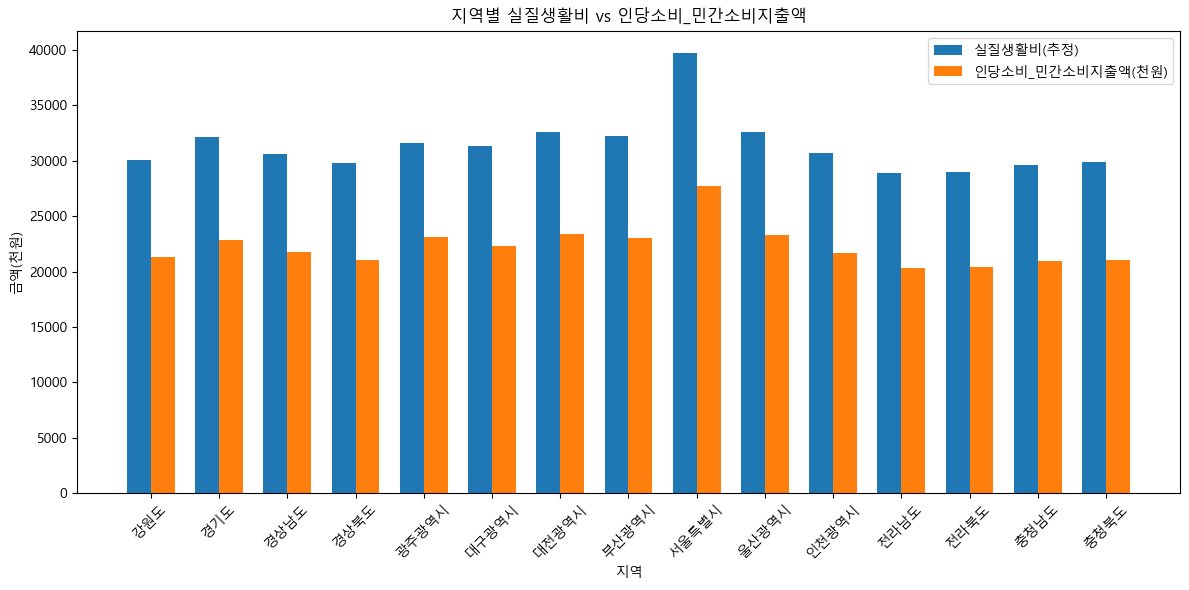

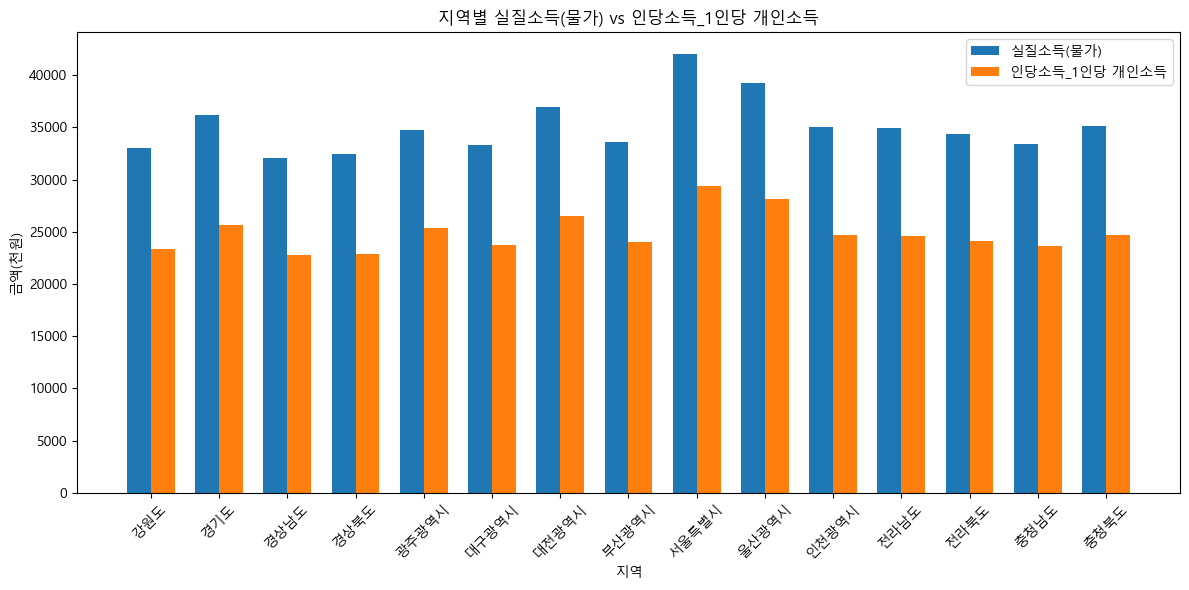

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
실질_df = pd.read_csv("정제된_도별_실질생활비_소득.csv", encoding='utf-8')
원본_df = pd.read_csv("최종_통합_병합결과.csv", encoding='utf-8')

# 2. 지역 앞단어 추출 (예: '서울특별시 강남구' → '서울특별시')
def extract_prefix(name):
    if pd.isnull(name):
        return None
    return str(name).split()[0]

원본_df['지역단위'] = 원본_df['지역'].apply(extract_prefix)

# 3. 원본 데이터를 지역단위로 그룹화하여 평균값 계산
grouped = 원본_df.groupby('지역단위').agg({
    '인당소비_민간소비지출액(천원)': 'mean',
    '인당소득_1인당 개인소득': 'mean'
}).reset_index()

# 4. 병합 (실질_df의 '지역'과 원본의 '지역단위' 기준)
merged_df = pd.merge(
    실질_df,
    grouped,
    left_on='지역',
    right_on='지역단위',
    how='inner'
)

# 5. 시각화: 실질생활비 vs 인당소비_민간소비지출액
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(merged_df))

plt.bar(index, merged_df['실질생활비(추정)'], bar_width, label='실질생활비(추정)')
plt.bar([i + bar_width for i in index], merged_df['인당소비_민간소비지출액(천원)'], bar_width, label='인당소비_민간소비지출액(천원)')

plt.xlabel('지역')
plt.ylabel('금액(천원)')
plt.title('지역별 실질생활비 vs 인당소비_민간소비지출액')
plt.xticks([i + bar_width / 2 for i in index], merged_df['지역'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 6. 시각화: 실질소득(물가) vs 인당소득_1인당 개인소득
plt.figure(figsize=(12, 6))
plt.bar(index, merged_df['실질소득(물가)'], bar_width, label='실질소득(물가)')
plt.bar([i + bar_width for i in index], merged_df['인당소득_1인당 개인소득'], bar_width, label='인당소득_1인당 개인소득')

plt.xlabel('지역')
plt.ylabel('금액(천원)')
plt.title('지역별 실질소득(물가) vs 인당소득_1인당 개인소득')
plt.xticks([i + bar_width / 2 for i in index], merged_df['지역'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
